<a href="https://colab.research.google.com/github/UdayScience/MLforWireless/blob/main/PCA_Interference_Mitigation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Simulated received signal dataset (replace this with your actual dataset)
# Each row represents a received signal sample with multiple dimensions (features).
received_signals = np.random.rand(1000, 20)  # 1000 samples, 10 features each

def interference_mitigation_pca(received_signals, num_components):
    # Step 1: Perform mean normalization (optional but recommended)
    mean_signal = np.mean(received_signals, axis=0)
    normalized_signals = received_signals - mean_signal

    # Step 2: Apply PCA
    pca = PCA(n_components=num_components)
    reduced_signals = pca.fit_transform(normalized_signals)

    # Step 3: Reconstruct the signals
    reconstructed_signals = pca.inverse_transform(reduced_signals) + mean_signal

    return reconstructed_signals

# Define the number of components you want to retain after PCA (you can tune this parameter)
num_components = 10

# Apply interference mitigation using PCA
mitigated_signals = interference_mitigation_pca(received_signals, num_components)

# Calculate the signal-to-noise ratio (SNR) before and after interference mitigation
original_snr = np.mean(received_signals) / np.std(received_signals)
mitigated_snr = np.mean(mitigated_signals) / np.std(mitigated_signals)

print(f"Original SNR: {original_snr}")
print(f"Mitigated SNR for PCA with 10 components: {mitigated_snr}")


Original SNR: 1.7356736625349507
Mitigated SNR for PCA with 10 components: 2.3188525223108862


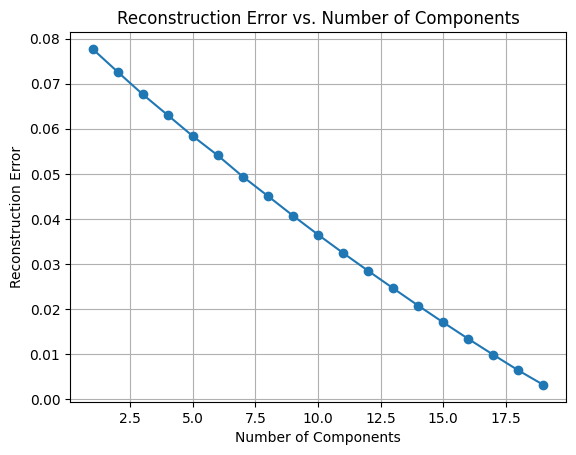

In [73]:
# Calculate and store the reconstruction error for different numbers of components
num_components_list = range(1, 20)  # Vary the number of components from 1 to 10
reconstruction_errors = []

for num_components in num_components_list:
    # Apply PCA
    pca = PCA(n_components=num_components)
    reduced_signals = pca.fit_transform(received_signals)
    reconstructed_signals = pca.inverse_transform(reduced_signals)

    # Calculate reconstruction error
    reconstruction_error = np.mean((received_signals - reconstructed_signals) ** 2)
    reconstruction_errors.append(reconstruction_error)

# Plot the reconstruction error vs. the number of components
plt.plot(num_components_list, reconstruction_errors, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Reconstruction Error')
plt.title('Reconstruction Error vs. Number of Components')
plt.grid()
plt.show()